<a href="https://colab.research.google.com/github/Vedarham/Basics_Pennylane/blob/main/Basics_using_PennyLane_WISER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Introduction to Quantum Computing with PennyLane
# Install & Import PennyLane
# Task : create a Bell State using a circuit in PennyLane

!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
qml.about() # check installation and import

Name: PennyLane
Version: 0.41.1
Summary: PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.
Home-page: https://github.com/PennyLaneAI/pennylane
Author: 
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: appdirs, autograd, autoray, cachetools, diastatic-malt, networkx, numpy, packaging, pennylane-lightning, requests, rustworkx, scipy, tomlkit, typing-extensions
Required-by: PennyLane_Lightning

Platform info:           Linux-6.1.123+-x86_64-with-glibc2.35
Python version:          3.11.13
Numpy version:           2.0.2
Scipy version:           1.15.3
Installed devices:
- default.clifford (PennyLane-0.41.1)
- default.gaussian (PennyLane-0.41.1)
- default.mixed (PennyLane-0.41.1)
- default.qubit (PennyLane-0.41.1)
- default.qutrit (PennyLane-0.41.1)
- default.qutrit.mixed (PennyLane-0.41.1)
- default.tensor (PennyL

In [ ]:
#Checklist : installed , imported , checked them as well

# Define Backend : find devices and tie them
# 2 show a bell state
dev1 = qml.device("default.qubit", wires = 2)

In [ ]:
# Define a QNode with Circuit that creates a Bell State
# Hadamard creates a superposition and o/p with CNOt gates create an entaglement creating a Bell State
@qml.qnode(dev1)
def circuit():  # Creating a bell state
  qml.Hadamard(wires = [0]) # why use Arrray ?
  qml.CNOT(wires = [0,1])   # 0 as control, 1 as target
  return qml.probs()

(<Figure size 500x300 with 1 Axes>, <Axes: >)

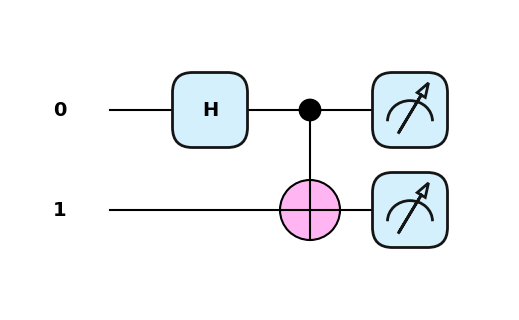

In [ ]:
qml.draw_mpl(circuit, style='pennylane')() # many styling options

In [ ]:
%%timeit
circuit() # Exe. a circuit , which returns us probability of Bell State

1.24 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# 50% probab of observing state 00 , 0% of 01 , 0% of 10 , 50% of 11

In [ ]:
# Changing backend === changing device

dev = qml.device('lightning.qubit',wires=2)
@qml.qnode(dev)
def circuit():  # Creating a bell state
  qml.Hadamard(wires = [0]) # why use Arrray ?
  qml.CNOT(wires = [0,1])   # 0 as control, 1 as target
  return qml.probs()


(<Figure size 500x300 with 1 Axes>, <Axes: >)

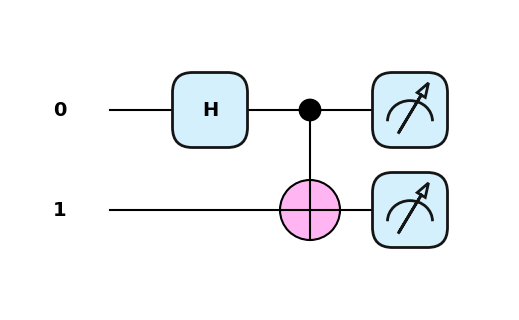

In [ ]:

qml.draw_mpl(circuit, style='pennylane')()

In [ ]:
%%timeit
circuit()

847 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Introducing Shots : "repeating"
dev = qml.device('lightning.qubit',wires=2,shots=100)
@qml.qnode(dev)
def circuit():  # Creating a bell state
  qml.Hadamard(wires = [0]) # why use Arrray ?
  qml.CNOT(wires = [0,1])   # 0 as control, 1 as target
  return qml.probs()

In [ ]:
circuit()

array([0.58, 0.  , 0.  , 0.42])

In [ ]:
# Introducing Sub Circuit
def subcircuits(x):
  qml.RX(x,wires=0)

dev = qml.device('lightning.qubit',wires=2)
@qml.qnode(dev)
def circuit(params):
  for i in range(2):
    subcircuits(1*params[0])
  return qml.probs()

qml.draw_mpl(circuit,decimals=1, style='pennylane')()